## Mean Variance Optimal Portfolio

Exploring the mean variance optimal portfolio for Layer 1 Blockchains using Pyportfolio and lectures from Python for Finance by Matt Brigida 

### Importing the required libraries

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import plotly.express as px
import datetime
from datetime import date

### Downloading and Importing the Stock Data into Pandas Dataframe

Using the yfinance library we extract the hitorical data to the dataframe stored as crypto_data

In [30]:
today = date.today()
crypto_data = yf.download("AVAX-USD CRO-USD FTM-USD HEX-USD KDA-USD LUNA1-USD METIS-USD SCRT-USD", start ="2021-8-1", end= today)

[*********************100%***********************]  8 of 8 completed


In [31]:
crypto_data

Adj Close                                                     \
             AVAX-USD   CRO-USD   FTM-USD   HEX-USD   KDA-USD  LUNA1-USD   
Date                                                                       
2021-07-31  13.591609  0.129889  0.255758  0.123039  0.343999  10.757215   
2021-08-01  12.877432  0.124230  0.246374  0.123434  0.357892  11.928194   
2021-08-02  13.006891  0.125295  0.250918  0.117302  0.335549  12.329428   
2021-08-03  12.533294  0.119488  0.237588  0.141227  0.335746  14.719025   
2021-08-04  13.679925  0.126166  0.244945  0.145970  0.331711  14.513123   
...               ...       ...       ...       ...       ...        ...   
2022-02-17  88.123772  0.429725  1.893281  0.188344  7.162840  50.254269   
2022-02-18  83.836975  0.435283  1.866916  0.177592  6.813983  50.726456   
2022-02-19  85.099319  0.436837  1.876619  0.178760  6.967293  50.432465   
2022-02-20  77.336784  0.404562  1.729576  0.157774  6.198658  49.364559   
2022-02-21  69.988930  0.385949  1.541422  0.162088  5.836202  50.176693   

                                      Close            ...        Open  \
             METIS-USD  SCRT-USD   AVAX-USD   CRO-USD  ...   METIS-USD   
Date                                                   ...               
2021-07-31    5.106153  1.088934  13.591609  0.129889  ...    5.120851   
2021-08-01    4.960685  1.100719  12.877432  0.124230  ...    5.108792   
2021-08-02    5.093099  1.097120  13.006891  0.125295  ...    4.822959   
2021-08-03    4.983076  1.075057  12.533294  0.119488  ...    5.098373   
2021-08-04    4.970394  1.261684  13.679925  0.126166  ...    4.994420   
...                ...       ...        ...       ...  ...         ...   
2022-02-17  127.757233  6.129787  88.123772  0.429725  ...  158.615829   
2022-02-18  119.086220  6.063940  83.836975  0.435283  ...  127.745872   
2022-02-19  118.571327  6.000636  85.099319  0.436837  ...  119.069847   
2022-02-20  110.083969  5.619753  77.336784  0.404562  ...  118.581650   
2022-02-21  105.836937  5.452533  69.988930  0.385949  ...  110.062759   

                          Volume                                              \
            SCRT-USD    AVAX-USD    CRO-USD     FTM-USD   HEX-USD    KDA-USD   
Date                                                                           
2021-07-31  1.059298    67970748   29261956    38365442  29471168     537791   
2021-08-01  1.087758    90946247   28128155    48995257  23757644     739722   
2021-08-02  1.099860    54993392   48367917    37332532  28343584     706029   
2021-08-03  1.097538    60826755   26645802    27421957  51687160     521128   
2021-08-04  1.077270    66911765   32410574    32686295  44312597     549997   
...              ...         ...        ...         ...       ...        ...   
2022-02-17  6.652379  1798309218  147199196   818157046  37354023  147541548   
2022-02-18  6.133684  1283023478  170287754   562000106  19040836   51442854   
2022-02-19  6.062823   850252533   94871141   337348806  16395261   29400850   
2022-02-20  6.000649   984477195  110537230   701777691  25596197   45711987   
2022-02-21  5.620300  1626858109  146932635  1018263085  14411208   72223440   

                                            
             LUNA1-USD METIS-USD  SCRT-USD  
Date                                        
2021-07-31   307229821     91632    964984  
2021-08-01   446563025    107653   1242602  
2021-08-02   391321193    114671   1397833  
2021-08-03   890636970     86491   1240233  
2021-08-04   787381881     89661   7764487  
...                ...       ...       ...  
2022-02-17  1165569230  45998332  35972644  
2022-02-18  1263578810  34928695  33188080  
2022-02-19   881733436  27705304  20833160  
2022-02-20  1092855688  28615613  21997098  
2022-02-21  2011987505  40283079  35743122  

[206 rows x 48 columns]

Extracting just the adjusted close data from dataframe:

In [32]:
crypto_adj_close_data = crypto_data['Adj Close']
crypto_adj_close_data #crypto_data=stock_data=crypt_adj

,AVAX-USD,CRO-USD,FTM-USD,HEX-USD,KDA-USD,LUNA1-USD,METIS-USD,SCRT-USD
Date,,,,,,,,
2021-07-31,13.591609,0.129889,0.255758,0.123039,0.343999,10.757215,5.106153,1.088934
2021-08-01,12.877432,0.124230,0.246374,0.123434,0.357892,11.928194,4.960685,1.100719
2021-08-02,13.006891,0.125295,0.250918,0.117302,0.335549,12.329428,5.093099,1.097120
2021-08-03,12.533294,0.119488,0.237588,0.141227,0.335746,14.719025,4.983076,1.075057
2021-08-04,13.679925,0.126166,0.244945,0.145970,0.331711,14.513123,4.970394,1.261684
...,...,...,...,...,...,...,...,...
2022-02-17,88.123772,0.429725,1.893281,0.188344,7.162840,50.254269,127.757233,6.129787
2022-02-18,83.836975,0.435283,1.866916,0.177592,6.813983,50.726456,119.086220,6.063940
2022-02-19,85.099319,0.436837,1.876619,0.178760,6.967293,50.432465,118.571327,6.000636


We need to convert the price series into percentage change (returns) using the pct_change function from the pandas library.

In [33]:
crypto_returns = crypto_adj_close_data.pct_change()[1:] #Calculated from the secod row and onwards

In [34]:
crypto_returns

,AVAX-USD,CRO-USD,FTM-USD,HEX-USD,KDA-USD,LUNA1-USD,METIS-USD,SCRT-USD
Date,,,,,,,,
2021-08-01,-0.052545,-0.043568,-0.036691,0.003210,0.040387,0.108855,-0.028489,0.010823
2021-08-02,0.010053,0.008573,0.018444,-0.049678,-0.062429,0.033637,0.026693,-0.003270
2021-08-03,-0.036411,-0.046347,-0.053125,0.203961,0.000587,0.193812,-0.021602,-0.020110
2021-08-04,0.091487,0.055888,0.030965,0.033584,-0.012018,-0.013989,-0.002545,0.173597
2021-08-05,0.011283,0.030333,0.061646,-0.007296,0.017434,0.002860,0.017906,0.005465
...,...,...,...,...,...,...,...,...
2022-02-17,-0.075749,-0.104417,-0.085328,-0.046625,-0.116699,-0.103491,-0.194582,-0.078854
2022-02-18,-0.048645,0.012934,-0.013926,-0.057087,-0.048704,0.009396,-0.067871,-0.010742
2022-02-19,0.015057,0.003570,0.005197,0.006577,0.022499,-0.005796,-0.004324,-0.010439


### Calculating the Expected Returns and the Variance-Covariance Matrix

We will use the PyPortfolio package to calculate the expected returns rather than the raw approach:

Using Pyportfolio package:

In [35]:
mu2 = expected_returns.mean_historical_return(crypto_adj_close_data)

Using Raw method:

Displaying the returns:

In [36]:
print(mu2)
type(mu2)

AVAX-USD      6.497943
CRO-USD       2.814097
FTM-USD       8.097934
HEX-USD       0.403309
KDA-USD      31.469476
LUNA1-USD     5.639530
METIS-USD    40.532216
SCRT-USD      6.244228
dtype: float64


pandas.core.series.Series

<AxesSubplot:xlabel='Date'>

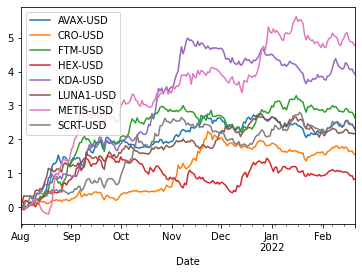

In [37]:
crypto_adj_close_data.pct_change()[1:].cumsum().plot()

### Variance-Covariance Matrix

Using Pyportfolio package:

In [38]:
cov_matrix2 = risk_models.sample_cov(crypto_adj_close_data)
print(cov_matrix2)
type(cov_matrix2)

           AVAX-USD   CRO-USD   FTM-USD   HEX-USD   KDA-USD  LUNA1-USD  \
AVAX-USD   1.580995  0.552282  0.594812  0.180693  0.780637   0.819485   
CRO-USD    0.552282  1.138635  0.645307  0.078559  0.574765   0.358592   
FTM-USD    0.594812  0.645307  2.071635  0.289930  0.642901   0.605968   
HEX-USD    0.180693  0.078559  0.289930  1.435242  0.175524   0.254806   
KDA-USD    0.780637  0.574765  0.642901  0.175524  2.763425   0.661845   
LUNA1-USD  0.819485  0.358592  0.605968  0.254806  0.661845   1.642882   
METIS-USD  0.651337  0.922034  1.253189  0.492537  1.143852   0.364819   
SCRT-USD   0.648261  0.614336  0.898371  0.225799  0.708742   0.624956   

           METIS-USD  SCRT-USD  
AVAX-USD    0.651337  0.648261  
CRO-USD     0.922034  0.614336  
FTM-USD     1.253189  0.898371  
HEX-USD     0.492537  0.225799  
KDA-USD     1.143852  0.708742  
LUNA1-USD   0.364819  0.624956  
METIS-USD   4.567298  0.929646  
SCRT-USD    0.929646  1.829948  


pandas.core.frame.DataFrame

Using Raw method:

In [39]:
cov_matrix = crypto_returns.cov()
print(cov_matrix)
type(cov_matrix)

           AVAX-USD   CRO-USD   FTM-USD   HEX-USD   KDA-USD  LUNA1-USD  \
AVAX-USD   0.006274  0.002192  0.002360  0.000717  0.003098   0.003252   
CRO-USD    0.002192  0.004518  0.002561  0.000312  0.002281   0.001423   
FTM-USD    0.002360  0.002561  0.008221  0.001151  0.002551   0.002405   
HEX-USD    0.000717  0.000312  0.001151  0.005695  0.000697   0.001011   
KDA-USD    0.003098  0.002281  0.002551  0.000697  0.010966   0.002626   
LUNA1-USD  0.003252  0.001423  0.002405  0.001011  0.002626   0.006519   
METIS-USD  0.002585  0.003659  0.004973  0.001955  0.004539   0.001448   
SCRT-USD   0.002572  0.002438  0.003565  0.000896  0.002812   0.002480   

           METIS-USD  SCRT-USD  
AVAX-USD    0.002585  0.002572  
CRO-USD     0.003659  0.002438  
FTM-USD     0.004973  0.003565  
HEX-USD     0.001955  0.000896  
KDA-USD     0.004539  0.002812  
LUNA1-USD   0.001448  0.002480  
METIS-USD   0.018124  0.003689  
SCRT-USD    0.003689  0.007262  


pandas.core.frame.DataFrame

In [40]:
corr = crypto_returns.corr()
corr.style.background_gradient(cmap='coolwarm')
#plotting.plot_covariance(cov_matrix2, plot_correlation=True);

,AVAX-USD,CRO-USD,FTM-USD,HEX-USD,KDA-USD,LUNA1-USD,METIS-USD,SCRT-USD
AVAX-USD,1.000000,0.411626,0.328669,0.119954,0.373474,0.508478,0.242388,0.381123
CRO-USD,0.411626,1.000000,0.420163,0.061453,0.324022,0.262183,0.404320,0.425593
FTM-USD,0.328669,0.420163,1.000000,0.168141,0.268697,0.328465,0.407409,0.461402
HEX-USD,0.119954,0.061453,0.168141,1.000000,0.088135,0.165938,0.192374,0.139329
KDA-USD,0.373474,0.324022,0.268697,0.088135,1.000000,0.310620,0.321971,0.315170
LUNA1-USD,0.508478,0.262183,0.328465,0.165938,0.310620,1.000000,0.133182,0.360435
METIS-USD,0.242388,0.404320,0.407409,0.192374,0.321971,0.133182,1.000000,0.321565
SCRT-USD,0.381123,0.425593,0.461402,0.139329,0.315170,0.360435,0.321565,1.000000


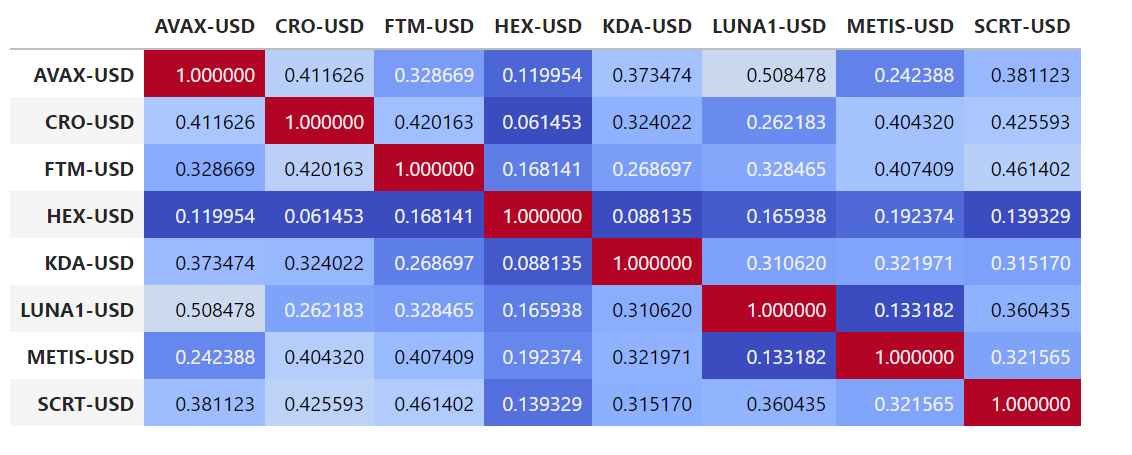!

### Mean-Variance Efficient Portfolio

Using Pyportfolio package:

In [41]:
ef = EfficientFrontier(mu2, cov_matrix2) #return the Effiecient Frontier
ef.max_sharpe() #return Max Sharpe ratio

OrderedDict([('AVAX-USD', 0.0),
             ('CRO-USD', 0.0),
             ('FTM-USD', 0.0),
             ('HEX-USD', 0.0),
             ('KDA-USD', 0.5615202438814821),
             ('LUNA1-USD', 0.0),
             ('METIS-USD', 0.4384797561185178),
             ('SCRT-USD', 0.0)])

Returning the portfolio performance

In [42]:
ef.portfolio_performance(verbose = True)

Expected annual return: 3544.3%
Annual volatility: 152.1%
Sharpe Ratio: 23.29


(35.44330418932006, 1.520762464618684, 23.293121058325237)

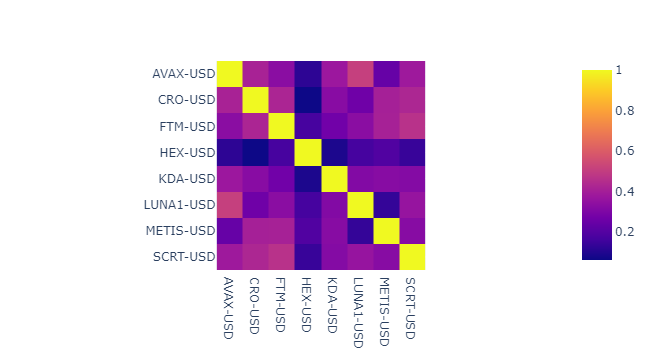

In [43]:
fig = px.imshow(crypto_returns.corr())
fig.show()

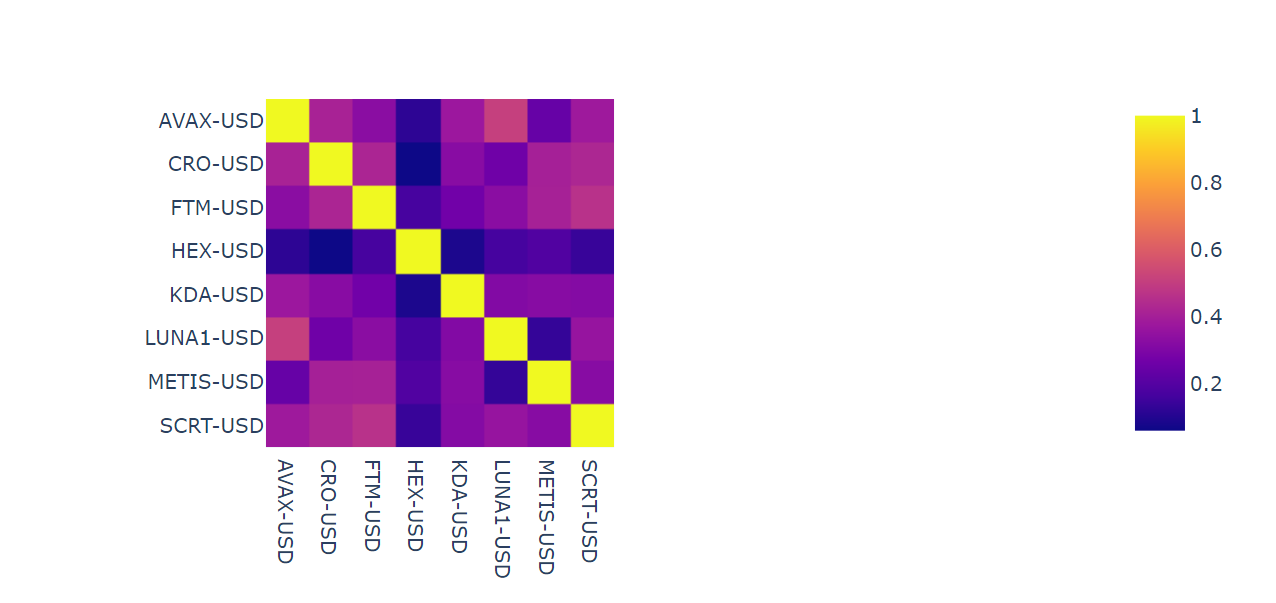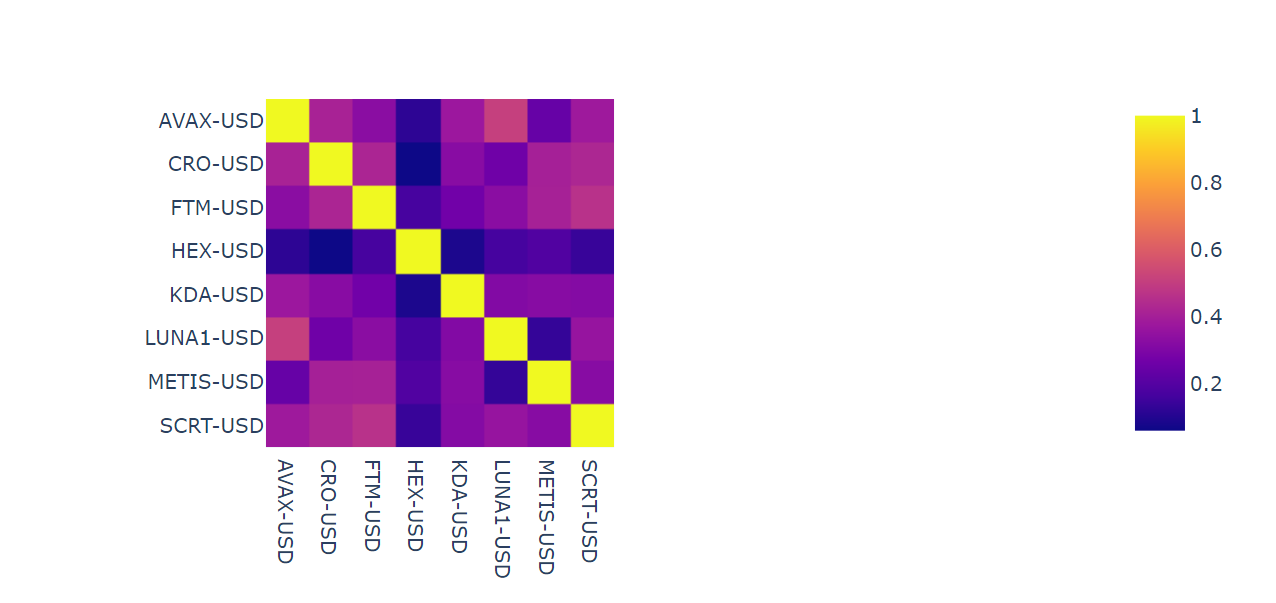